# Resolución Trabajo 1

## Problema 1

2
['GA'] 14
3
['CGA'] 6
4
['ATTT', 'CGAT'] 3
5
['TTTAT', 'GAGTC', 'CGATT', 'ATTTG', 'TTTGA', 'TTGAG'] 2
6
['ATTTGA', 'TTTGAG'] 2
7
['ATTTGAG'] 2
8
['AGTAGGGG', 'GTAGGGGT', 'TAGGGGTG', 'AGGGGTGT', 'GGGGTGTC', 'GGGTGTCA', 'GGTGTCAG', 'GTGTCAGC', 'TGTCAGCA', 'GTCAGCAA', 'TCAGCAAA', 'CAGCAAAC', 'AGCAAACT', 'GCAAACTC', 'CAAACTCG', 'AAACTCGG', 'AACTCGGC', 'ACTCGGCA', 'CTCGGCAT', 'TCGGCATT', 'CGGCATTT', 'GGCATTTT', 'GCATTTTA', 'CATTTTAT', 'ATTTTATA', 'TTTTATAG', 'TTTATAGA', 'TTATAGAG', 'TATAGAGT', 'ATAGAGTC', 'TAGAGTCG', 'AGAGTCGG', 'GAGTCGGA', 'AGTCGGAC', 'GTCGGACG', 'TCGGACGA', 'CGGACGAT', 'GGACGATG', 'GACGATGT', 'ACGATGTG', 'CGATGTGG', 'GATGTGGC', 'ATGTGGCG', 'TGTGGCGA', 'GTGGCGAT', 'TGGCGATT', 'GGCGATTT', 'GCGATTTG', 'CGATTTGA', 'GATTTGAG', 'ATTTGAGC', 'TTTGAGCA', 'TTGAGCAG', 'TGAGCAGG', 'GAGCAGGC', 'AGCAGGCG', 'GCAGGCGC', 'CAGGCGCG', 'AGGCGCGA', 'GGCGCGAC', 'GCGCGACA', 'CGCGACAA', 'GCGACAAA', 'CGACAAAT', 'GACAAATT', 'ACAAATTC', 'CAAATTCA', 'AAATTCAA', 'AATTCAAT', 'ATTCAATG', 'TTCAATGA', 

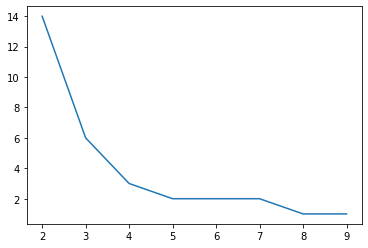

In [196]:
from matplotlib import pyplot as plt

def FrequencyDictionary(Text, k):
    freqMap = {} # empty map
    n = len(Text) # n ← |Text|
    for i in range(n-k+1): #for i ← 0 to n − k
        Pattern = Text[i:(i+k)] # Pattern ← Text(i, k)
        if not Pattern in freqMap: # if freqMap[Pattern] doesn't exist
            freqMap[Pattern] = 1 #freqMap[Pattern]← 1
        else: #else
            freqMap[Pattern] += 1 # freqMap[Pattern] + 1 #freqMap[pattern] ←freqMap[pattern]+1 
    return( freqMap )


def BetterFrequentWords(Text, k):
    FrequentPatterns = []#← an array of strings of length 0
    freqMap = FrequencyDictionary(Text, k)
    maxvalue = max(freqMap.values())
    for Pattern in freqMap:
        if freqMap[Pattern] == maxvalue:
            FrequentPatterns.append(Pattern)
    return( FrequentPatterns, maxvalue)


seq = "AGTAGGGGTGTCAGCAAACTCGGCATTTTATAGAGTCGGACGATGTGGCGATTTGAGCAGGCGCGACAAATTCAATGATCCGATTGTTGCGGCCGACGTATCAGACAGGAGAAAACGAGCGGTTTATTTGAGTCATCACATGCCTAGTTG"

counts = []
for k in range(2,10):
    print(k)
    seqs,count = BetterFrequentWords(seq, k)
    counts.append(count)
    print(seqs,count)
    
plt.plot(range(2,10),counts)

## Problema 2

In [199]:
# Selección aleatoria de alineaciones alternativas
import numpy as np
from Bio.SubsMat import MatrixInfo

def altArgMax(x):
    m = np.max(x)
    l = len(x)
    I = []
    for i in range(l):
        if x[i]==m:
            I.append(i)
    if len(I)>1:
        k = np.random.randint(0,len(I))
        return(I[k])
    else:
        return(I[0])

def getTraceMatrix(seq1,seq2):
    d=8
    traceMatrix=np.zeros((len(seq2),len(seq1)) ) 
    Fmatrix=np.zeros((len(seq2),len(seq1)) )  
    # Set first column
    Fmatrix[:,0] = -d*np.array(range( len(seq2) ))
    # Set first row
    Fmatrix[0,:] = -d*np.array(range( len(seq1) ))
    i = 1
    for value_i in seq2[1::]:
        j = 1
        for value_j in seq1[1::]:
            pair = (value_i,value_j)
            if not pair in MatrixInfo.blosum50:
                pair = tuple(reversed(pair))
            score=MatrixInfo.blosum50[pair]
            Fmatrix[i,j] = np.max([  Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d  ])
            indexMax=      altArgMax([Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d])
            traceMatrix[i,j] = indexMax              
            j += 1
        i += 1
    return([traceMatrix,Fmatrix])

def align(seq1,seq2):
    traceMatrix = getTraceMatrix(seq1,seq2)[0]
    I,J=traceMatrix.shape
    traceMatrix = np.array(traceMatrix)
    i = I-1
    j = J-1
    seq1Aligned = ""
    seq2Aligned = ""
    while i>0 or j>0:
        if traceMatrix[i,j] == 1:  #diagonal
            seq1Aligned += seq1[j]
            seq2Aligned += seq2[i]
            i -= 1
            j -= 1
        if traceMatrix[i,j] == 2: #vertical
            seq1Aligned += "-"
            seq2Aligned += seq2[i]
            i -= 1   
        if traceMatrix[i,j] == 0: #horizontal
            seq1Aligned += seq1[j]
            seq2Aligned += "-"
            j -= 1   
    print(seq1Aligned[::-1])
    print(seq2Aligned[::-1])

seq1 = "-QKLKLKLKLKLKL"
seq2 = "-QKL"

print("================")
align(seq1,seq2)
print("================")
align(seq1,seq2)
print("================")
align(seq1,seq2)

-QKLKLKLKLKLKL
-Q--------KL--
-QKLKLKLKLKLKL
-QK--------L--
-QKLKLKLKLKLKL
-Q--------K--L


In [197]:
# Selección directa de tres alineamientos alternativos
import numpy as np
from Bio.SubsMat import MatrixInfo

def altArgMax(x):
    m = np.max(x)
    l = len(x)
    I = []
    for i in range(l):
        if x[i]==m:
            I.append(i)
    return(I)

def getTraceMatrix(seq1,seq2,c):
    d=8
    traceMatrix=np.zeros((len(seq2),len(seq1)) ) 
    Fmatrix=np.zeros((len(seq2),len(seq1)) )  
    # Set first column
    Fmatrix[:,0] = -d*np.array(range( len(seq2) ))
    # Set first row
    Fmatrix[0,:] = -d*np.array(range( len(seq1) ))
    i = 1
    k = 0
    for value_i in seq2[1::]:
        j = 1
        for value_j in seq1[1::]:
            pair = (value_i,value_j)
            if not pair in MatrixInfo.blosum50:
                pair = tuple(reversed(pair))
            score=MatrixInfo.blosum50[pair]
            Fmatrix[i,j] = np.max([  Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d  ])
            indexMax =      altArgMax([Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d])
                    
            if len(indexMax)==1:
                traceMatrix[i,j] = indexMax[0]
            else:
                if c == 0: # k es siempre 1
                    k=1
                elif c==1: # k es siempre 0
                    k=0
                else:      # k oscila entre 0 y 1
                    if k == 1:
                        k = 0
                    else:
                        k = 1                
                traceMatrix[i,j] = indexMax[ k ]               
     
            j += 1
        i += 1
    return([traceMatrix,Fmatrix])

def align(seq1,seq2,c):
    traceMatrix = getTraceMatrix(seq1,seq2,c)[0]
    I,J=traceMatrix.shape
    traceMatrix = np.array(traceMatrix)
    i = I-1
    j = J-1
    seq1Aligned = ""
    seq2Aligned = ""
    while i>0 or j>0:
        if traceMatrix[i,j] == 1:  #diagonal
            seq1Aligned += seq1[j]
            seq2Aligned += seq2[i]
            i -= 1
            j -= 1
        if traceMatrix[i,j] == 2: #vertical
            seq1Aligned += "-"
            seq2Aligned += seq2[i]
            i -= 1   
        if traceMatrix[i,j] == 0: #horizontal
            seq1Aligned += seq1[j]
            seq2Aligned += "-"
            j -= 1   
    print(seq1Aligned[::-1])
    print(seq2Aligned[::-1])

seq1 = "-QKLKLKLKLKLKL"
seq2 = "-QKL"

print("================")
align(seq1,seq2,0)
print("================")
align(seq1,seq2,1)
print("================")
align(seq1,seq2,2)


-QKLKLKLKLKLKL
-Q----------KL
-QKLKLKLKLKLKL
-QKL----------
-QKLKLKLKLKLKL
-Q------K--L--


## Problema 3

In [200]:
import numpy as np
from Bio.SubsMat import MatrixInfo

def localF(seq1,seq2):
    d=8
    traceMatrix=np.zeros((len(seq2),len(seq1)) ) 
    Fmatrix=np.zeros((len(seq2),len(seq1)) )  

    i = 1
    for value_i in seq2[1::]:
        j = 1
        for value_j in seq1[1::]:
            pair = (value_i,value_j)
            if not pair in MatrixInfo.blosum50:
                pair = tuple(reversed(pair))
            score=MatrixInfo.blosum50[pair]
            Fmatrix[i,j] = np.max([  Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d,0  ])
            indexMax=      np.argmax([Fmatrix[i,j-1]-d,Fmatrix[i-1,j-1]+score,Fmatrix[i-1,j]-d,0])
            traceMatrix[i,j] = indexMax
            j += 1
        i += 1

    return([traceMatrix,Fmatrix])

def argmaxMatrix(Fmatrix,c):
    m=np.max(Fmatrix)
    I,J=Fmatrix.shape
    for i in range(I):
        for j in range(J):
            if Fmatrix[i,j]==m:
                II = i
                JJ = j
                if c==0: return([II,JJ])
    return([II,JJ])

def localAlign(seq1,seq2,c):
    [traceMatrix,Fmatrix] = localF(seq1,seq2)
    I,J=traceMatrix.shape
    traceMatrix = np.array(traceMatrix)
    # Encontrar lugar de inicio (en donde está el maximo de la matriz F            
    [i,j] = argmaxMatrix(Fmatrix,c)
    
    seq1Aligned = ""
    seq2Aligned = ""

    while traceMatrix[i,j]>0:
        if traceMatrix[i,j] == 1:  #diagonal
            seq1Aligned += seq1[j]
            seq2Aligned += seq2[i]
            i -= 1
            j -= 1
        if traceMatrix[i,j] == 2: #vertical
            seq1Aligned += "-"
            seq2Aligned += seq2[i]
            i -= 1   
        if traceMatrix[i,j] == 0: #horizontal
            seq1Aligned += seq1[j]
            seq2Aligned += "-"
            j -= 1  
        if traceMatrix[i,j] ==3:
            break
    print(seq1Aligned[::-1])
    print(seq2Aligned[::-1])

seq1 = "-KLKLCKLLKKLCLKKLC"
seq2 = "-KLKLCLK"  

print("====================")
localAlign(seq1,seq2,0)
print("====================")
localAlign(seq1,seq2,1)

-KLKLC
-KLKLC
KLCLK
KLCLK


In [ ]:
KLKLCKLLKKLCLKKLC
KLKLC

KLKLCKLLKKLCLKKLC
         KLCLK